In [85]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [86]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df["target"] = wine["target"]
print(df.head())
print(df.dtypes)
print(df.target.unique())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [87]:
X = df[wine.feature_names]

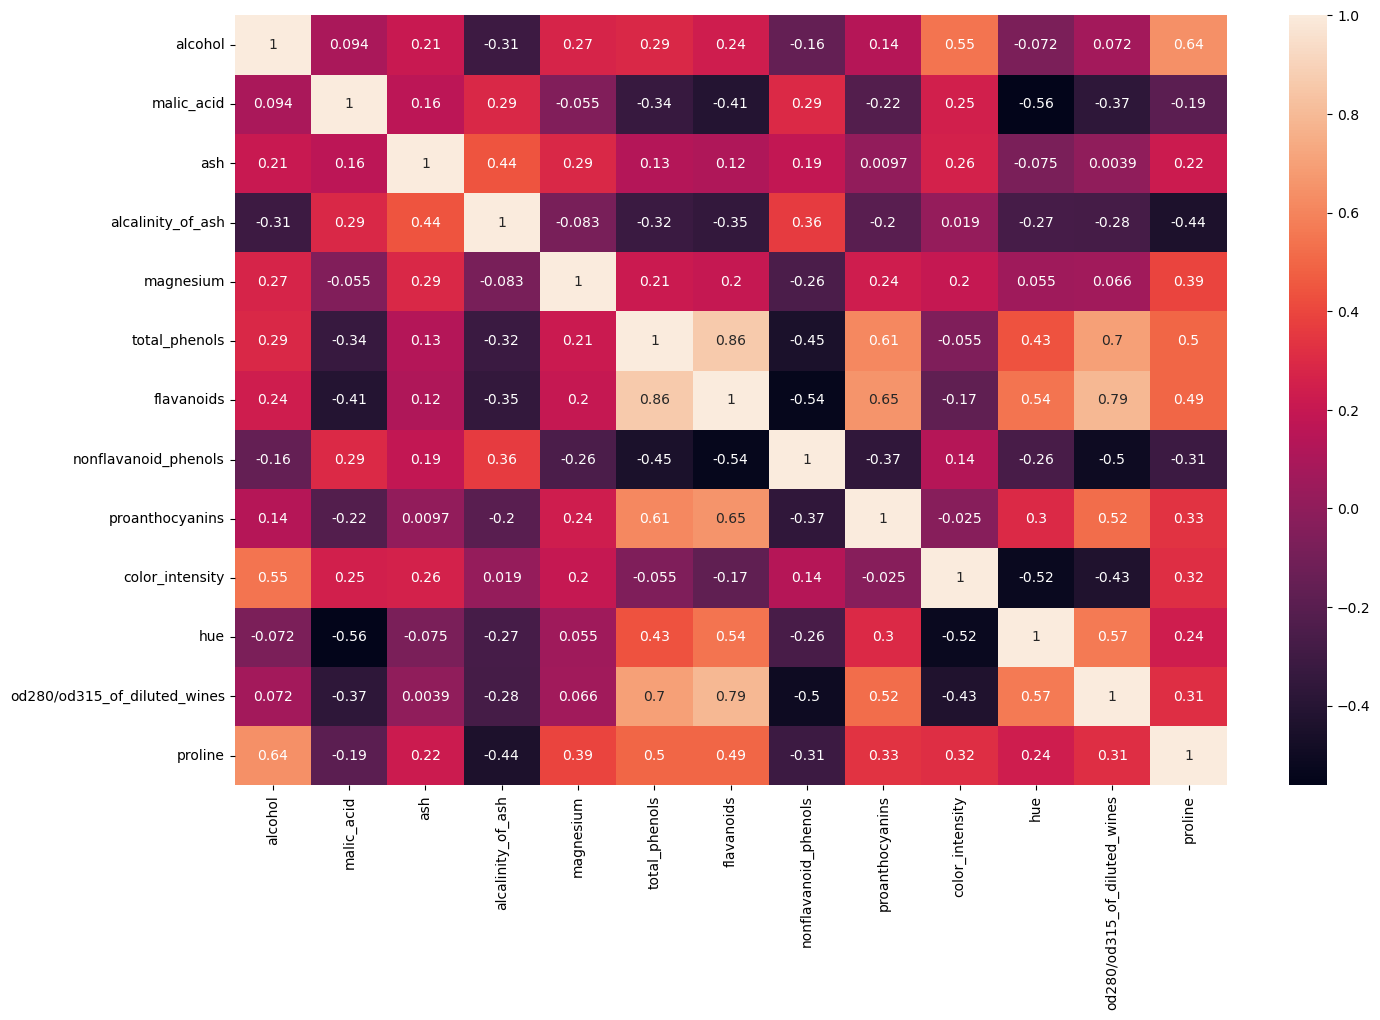

In [88]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,df.target,test_size = 0.3,random_state=10)
accuracy_list = []
for k in range(1,51):
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print(accuracy)
    accuracy_list.append(accuracy)

0.6851851851851852
0.6296296296296297
0.6851851851851852
0.7037037037037037
0.6481481481481481
0.6481481481481481
0.6296296296296297
0.6296296296296297
0.6296296296296297
0.6296296296296297
0.6296296296296297
0.6111111111111112
0.6296296296296297
0.6296296296296297
0.6296296296296297
0.6296296296296297
0.6111111111111112
0.5925925925925926
0.5740740740740741
0.6111111111111112
0.5925925925925926
0.6111111111111112
0.6111111111111112
0.6111111111111112
0.6111111111111112
0.6111111111111112
0.6111111111111112
0.6111111111111112
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.6111111111111112
0.6296296296296297
0.5925925925925926
0.5925925925925926
0.5925925925925926
0.6111111111111112


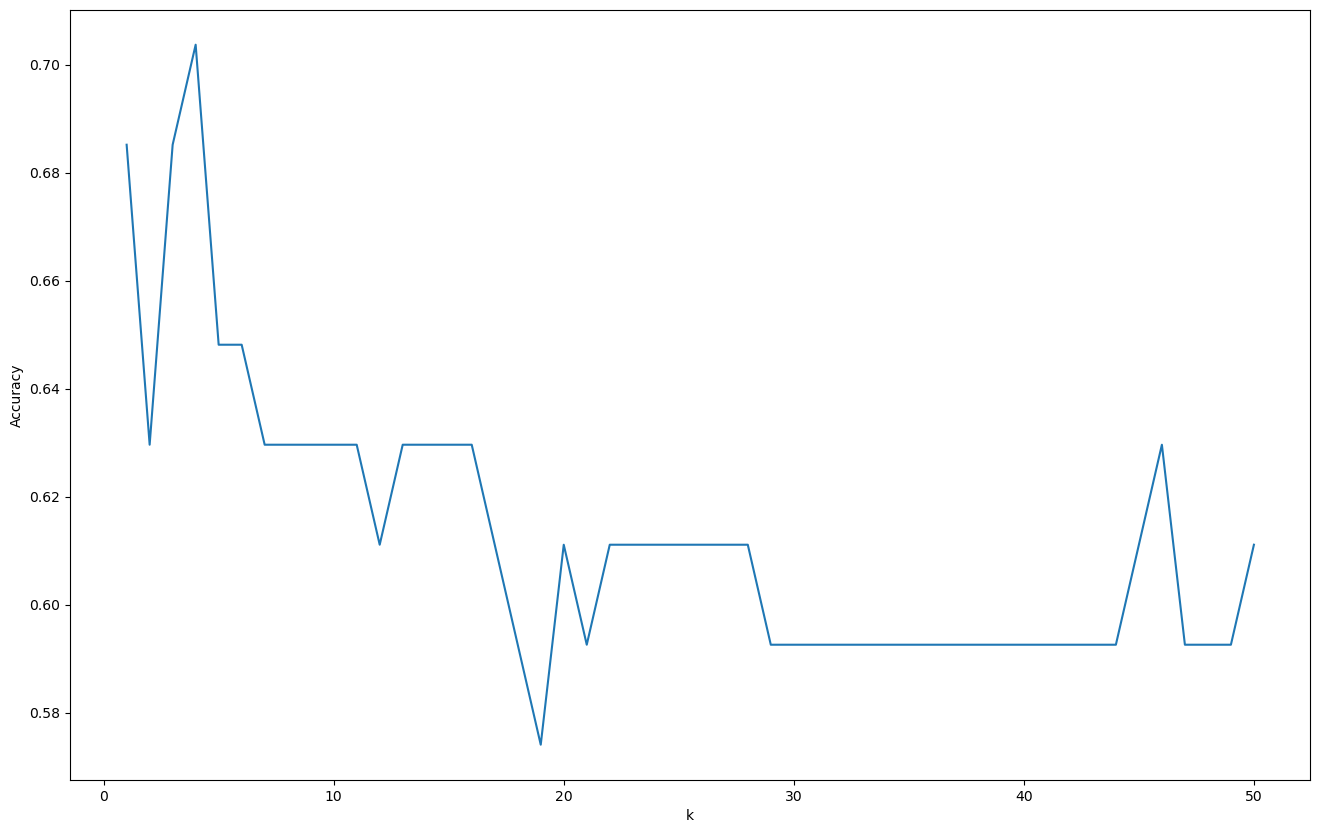

Best k is 4
Highest accuracy is 0.7037037037037037


In [90]:
plt.figure(figsize=(16,10))
plt.plot(list(range(1,51)),accuracy_list)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()
best_k = accuracy_list.index(max(accuracy_list))+1
print("Best k is",best_k)
print("Highest accuracy is",accuracy_list[best_k-1])

In [91]:
accuracy_list = []
for t in np.arange(0.1, 0.9, 0.1):
    X_train,X_test,y_train,y_test = train_test_split(X,df.target,test_size = t,random_state=10)
    classifier = KNeighborsClassifier(4)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = classifier.score(X_test, y_test)
    print(accuracy)
    accuracy_list.append(accuracy)

0.8888888888888888
0.75
0.7037037037037037
0.7083333333333334
0.6853932584269663
0.6635514018691588
0.656
0.6573426573426573


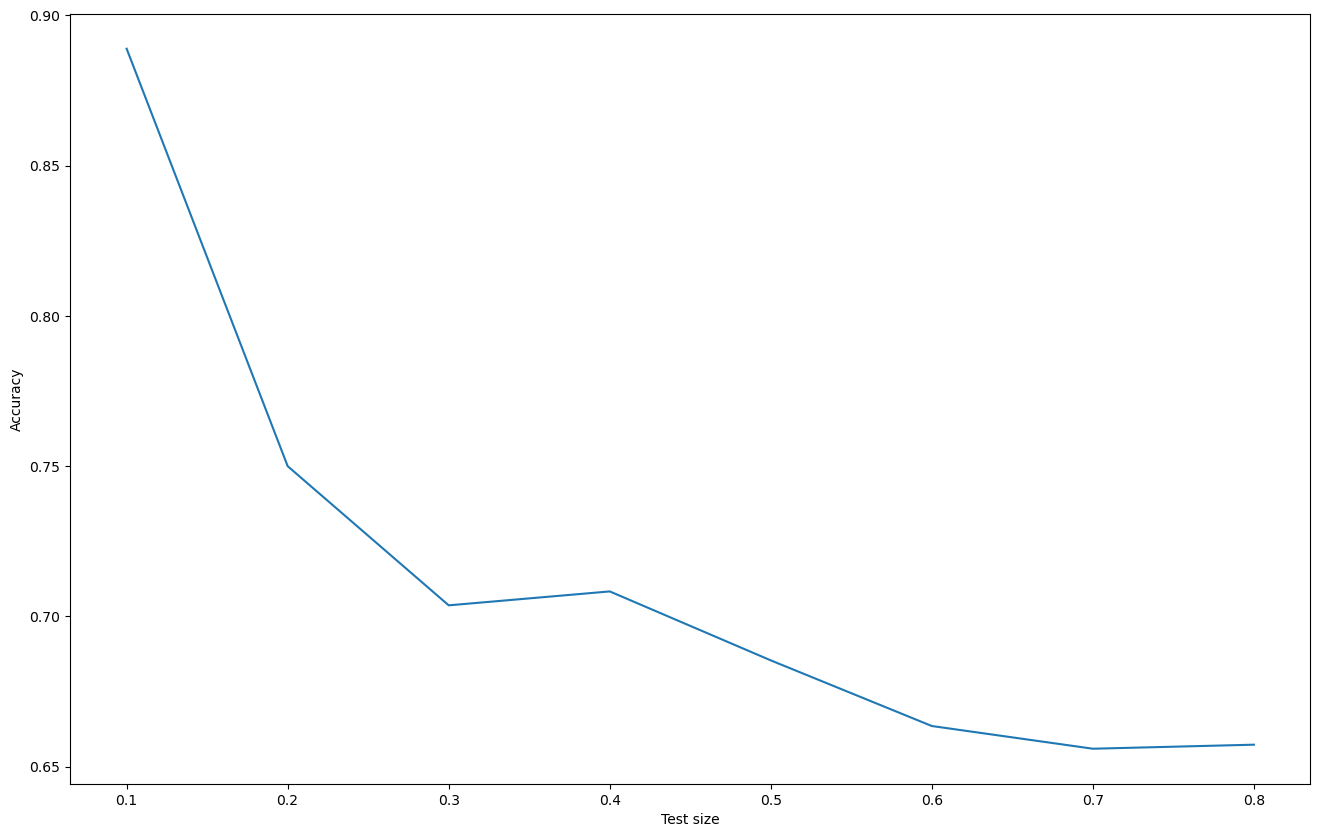

Best test size is 0.1
Highest accuracy is 0.8888888888888888


In [93]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0.1, 0.9, 0.1),accuracy_list)
plt.xlabel("Test size")
plt.ylabel("Accuracy")
plt.show()
best_t_index = accuracy_list.index(max(accuracy_list))
best_test_size = np.arange(0.1, 0.9, 0.1)[best_t_index]
print("Best test size is",best_test_size)
print("Highest accuracy is",max(accuracy_list))